In [16]:
import pandas as pd
import scipy as sp
from scipy import stats
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
import seaborn
import plotly.express as px
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('data/brain_size.csv', sep=';', na_values='.')

Exercise1

In [4]:
df[['VIQ']].mean()

VIQ    112.35
dtype: float64

In [5]:
groupby_gender = df.groupby('Gender')
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


In [7]:
df['MRI_base10'] = np.log10(df['MRI_Count'])

Exercise 2

ValueError: 'c' argument has 40 elements, which is inconsistent with 'x' and 'y' with size 39.

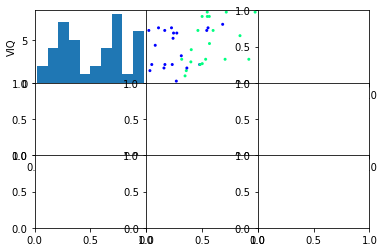

In [11]:
scatter_matrix(df[['VIQ', 'MRI_Count', 'Height']],
               c=(df['Gender'] == 'Male'),
               alpha=1, cmap='winter')

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()

In [13]:
female_viq = df.dropna()[df['Gender'] == 'Female']['VIQ']
male_viq = df.dropna()[df['Gender'] == 'Male']['VIQ']
sp.stats.mannwhitneyu(female_viq, male_viq)


/var/folders/sn/w009kb0n6zn_x17gcrqvxt2w0000gn/T/ipykernel_5918/4166484928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_viq = df.dropna()[df['Gender'] == 'Female']['VIQ']
/var/folders/sn/w009kb0n6zn_x17gcrqvxt2w0000gn/T/ipykernel_5918/4166484928.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_viq = df.dropna()[df['Gender'] == 'Male']['VIQ']


MannwhitneyuResult(statistic=146.0, pvalue=0.32577163152981836)

Exercise 4

Exercise 5

In [15]:
data = pd.read_csv('data/brain_size.csv')
model = ols('VIQ ~ Gender + MRI_Count + Height', df).fit()
print(model.summary())
print(model.f_test([0, 1, 0, 0]))

NameError: name 'ols' is not defined

In [32]:
df = pd.read_csv('data/brain_size.csv', sep=';', na_values='.')
model = ols('VIQ ~ Gender + MRI_Count + Height', df).fit()
print(model.summary())
print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Tue, 20 Sep 2022   Prob (F-statistic):             0.0184
Time:                        22:19:36   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.